<a href="https://colab.research.google.com/github/buggytanmoy77/Chaos/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of necessary libraries and tools

In [1]:
!pip install -q diffusers transformers accelerate torch xformers
!pip install -q clip-interrogator safetensors huggingface_hub
!pip install -q git+https://github.com/huggingface/transformers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Setting up CLIP

In [ ]:
!pip install --upgrade torchvision
!pip install clip-interrogator==0.6.0

from PIL import Image
from clip_interrogator import Config, Interrogator

ci = Interrogator(Config(
    clip_model_name="ViT-L-14/openai",
    device="cuda"
))

def get_prompt(image_path):
    image = Image.open(image_path).convert("RGB")
    return ci.interrogate(image)

  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached triton-3.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.9 MB/s eta 0:00:00
Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl (766.7 MB)
Using cached triton-3.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (253.2 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0


## Download and Initialization of SD model

In [ ]:
!wget https://civitai.com/api/download/models/501240 -O custom_model.safetensors

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_single_file(
    "custom_model.safetensors",
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

## Extracting Prompts from Image Files

In [ ]:
image_paths = [
    "/content/test_img1.jpg",
    "/content/test_img2.jpg"
]

prompts = [get_prompt(path) for path in image_paths]
print("\nExtracted Prompts:", prompts)

## Combining and Summarizing Image Prompts Using Transformers

In [ ]:
!pip install transformers
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
combined_prompts = " AND ".join([
    f"({prompt})" for prompt in prompts
])

summary = summarizer(combined_prompts, max_length=72, min_length=30, do_sample=False)[0]['summary_text']
summary = summary + ", best quality, high resolution,"
print("Combined and Summarized Prompt:")
print(summary)

## Generation of Image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['woman with red and black jewelry and a red flower , gold madhubani , featured on artstattion , intricate mural , painted in bright water colors , by alison kinnaird , ornate backdrop , highly - detailed illustration , bangladesh , featured on artsation , unique and intricate painting , the divine feminine , artstatiom , bride , shepard fairey )']


  0%|          | 0/100 [00:00<?, ?it/s]

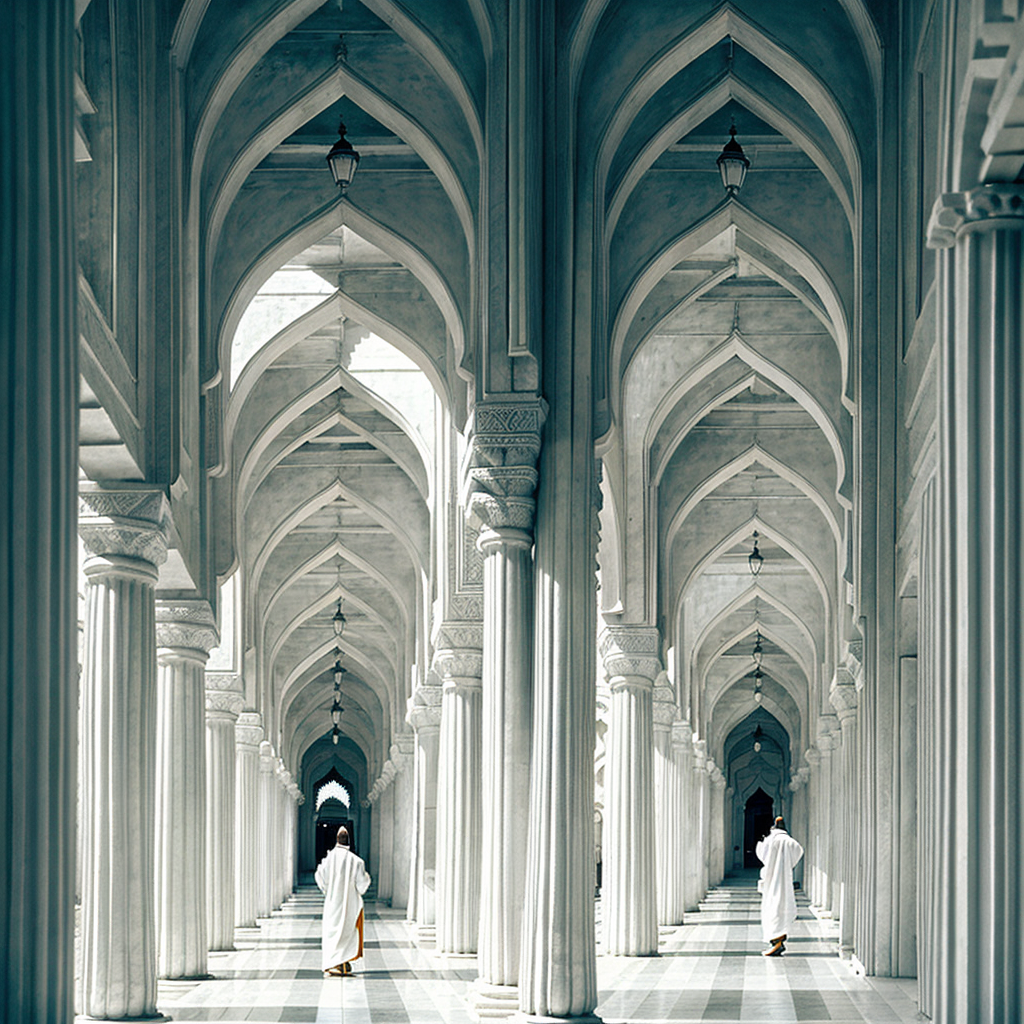

In [14]:
result = pipe(
    combined_prompts,
    negative_prompt="(deformed iris, deformed pupils, extra fingers), text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck,ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft, gender swap, gender change",
    num_inference_steps=100,
    guidance_scale=8,
    width=724,
    height=724,
    generator=torch.Generator(device="cuda").manual_seed(42)
).images[0]

result.save("output.png")
display(result)